# Gravitational Waves Data Preprocessing 


In [1]:
#Requiered libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries, TimeSeriesDict
from gwpy.plot import Plot
from gwpy.frequencyseries import FrequencySeries

- ## Helper Functions

In [2]:
#Function Purpose to Load npy Data given a path
def loadNpyData(path):
    data = np.load(path) 
    return data

In [3]:
#Function Purpose to Load CSV Data given a path
def loadCSVData(path):
    data = pd.read_csv(path)
    return data

In [4]:
#Function Purpose to return a labeled Data Frame of the Gravitational waves Time Series Data Frame
def createTSDataFrame(sample_data):
    labels = ['LIGO Hanford', 'LIGO Livingston', 'Virgo' ]
    df = pd.DataFrame(sample_data)
    df.index = labels
    return df 

In [5]:
#Function Purpose to return each time series object represented in the npy array, give Time Series Data
def read_ts_file(Time_Series_Data): 
    ts1 = TimeSeries(Time_Series_Data[0,:], sample_rate =2048)
    ts2 = TimeSeries(Time_Series_Data[1,:],sample_rate =2048)
    ts3 = TimeSeries(Time_Series_Data[2,:],sample_rate =2048)
    return  ts1, ts2, ts3

In [45]:
#Function to plot all 3 Time series individually
def plot_data(ts1, ts2, ts3):
    plot = Plot(ts1, ts2, ts3, separate=True, sharex=True, figsize=[17, 12])
    ax = plt.gca()   
    ax.set_xlim(0,2)
    
    plot.axes[0].set_xlabel('Time [s]')
    plot.axes[0].set_ylabel('GW Amplitude [Strain]')
    plot.axes[1].set_xlabel('Time [s]')
    plot.axes[1].set_ylabel('GW Amplitude [Strain]')
    plot.axes[2].set_xlabel('Time [s]')
    plot.axes[2].set_ylabel('GW Amplitude [Strain]')
    plot.show()

In [48]:
#Ploting all time series in one plot
def plot_data_jointly(ts1, ts2, ts3):  
    plot = Plot(figsize=(15, 9))
    ax = plot.add_subplot(xscale='auto-gps')
    ax.plot(ts1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
    ax.plot(ts2, color='gwpy:ligo-livingston', label='LIGO-Livingston')
    ax.plot(ts3, color='gwpy:virgo', label='Virgo')
    ax.set_xlim(0, 2)
    ax.set_ylabel('Gravitational Waves Amplitude')
    ax.set_xlabel('Time [s]')
    ax.set_title("Joint Plot of Time Series")
    ax.legend()
    plot.show()

- ##  Ploting Time Series Sample Data

In [8]:
#Loading sample data from given path
path1_signal = "../../../Group Project/data/train/0/0/0/000a1f352b.npy" #Signal
path_no_signal = "../../../Group Project/data/train/0/0/0/00001f4945.npy" #No Signal

sample_data_signal = loadNpyData(path1_signal)
sample_no_signal = loadNpyData(path_no_signal)

In [9]:
#Storing each timeseries (from each device), for both timeseries with a signal and no signal
ts_signal1,  ts_signal2,  ts_signal3 = read_ts_file(sample_data_signal)
ts_no_signal1,  ts_no_signal2,  ts_no_signal3 = read_ts_file(sample_no_signal)

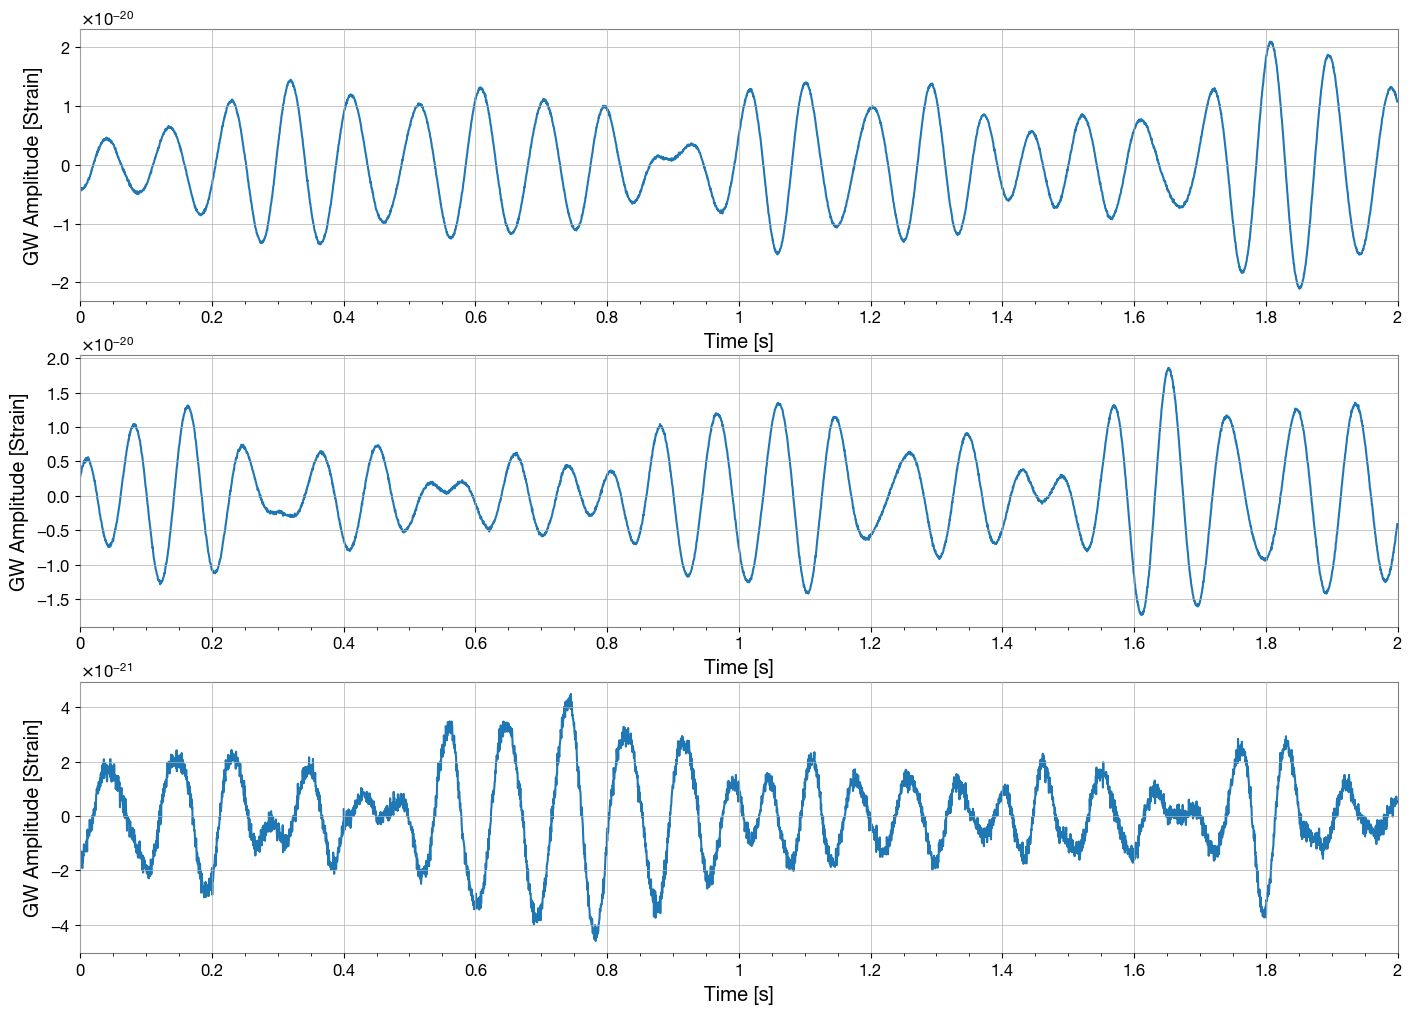

In [46]:
#ploting time Series with signal
plot_data(ts_signal1,  ts_signal2,  ts_signal3)

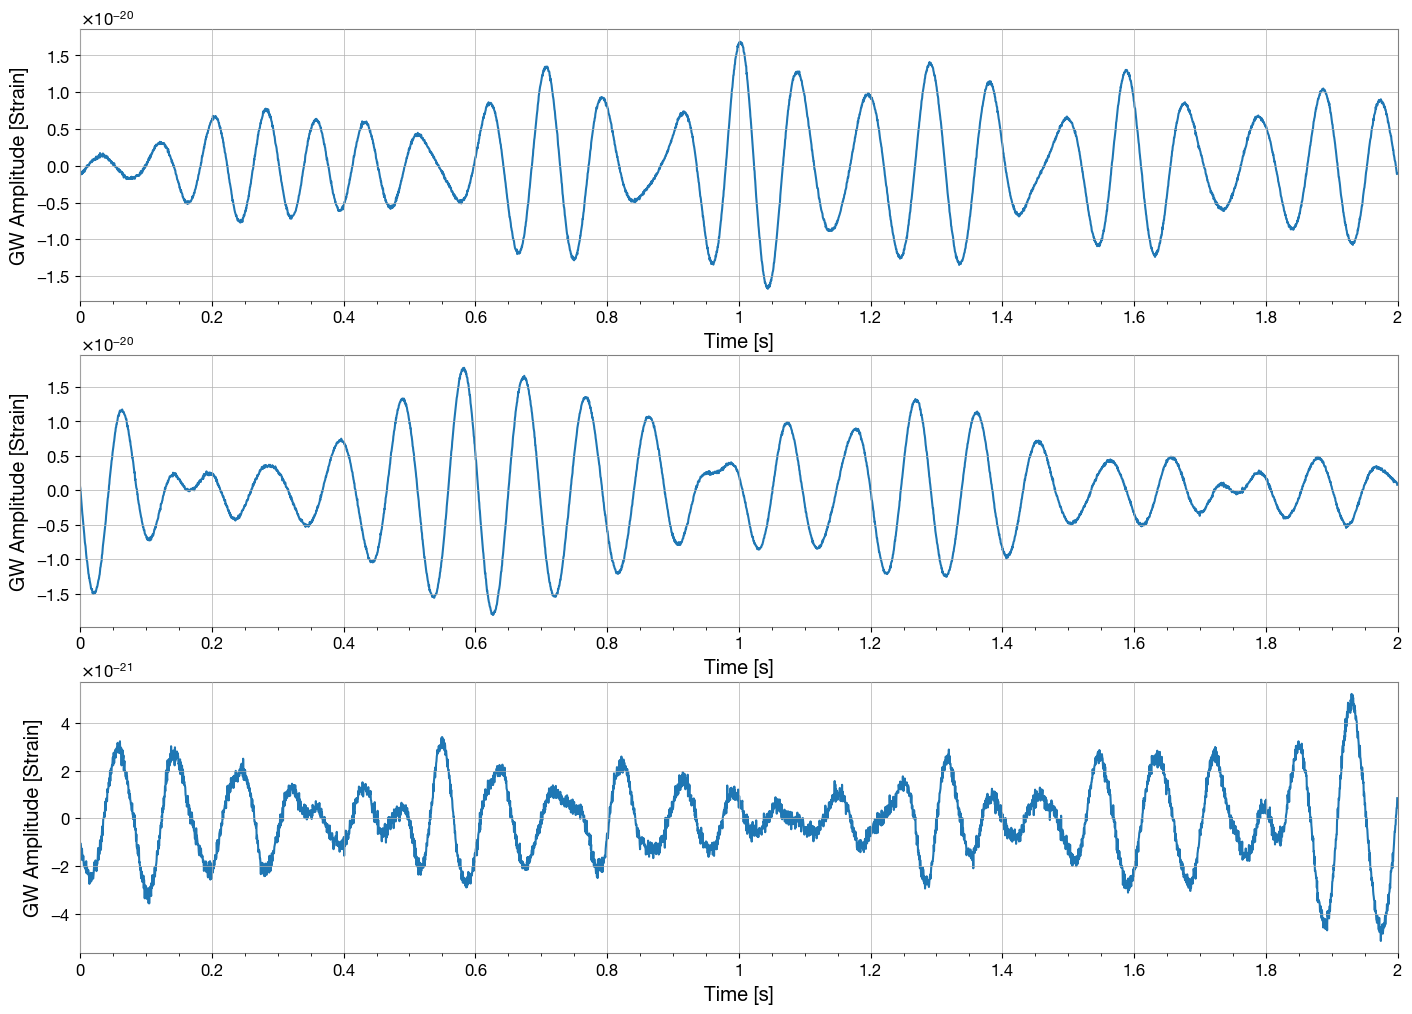

In [47]:
#ploting time Series without a signal
plot_data(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

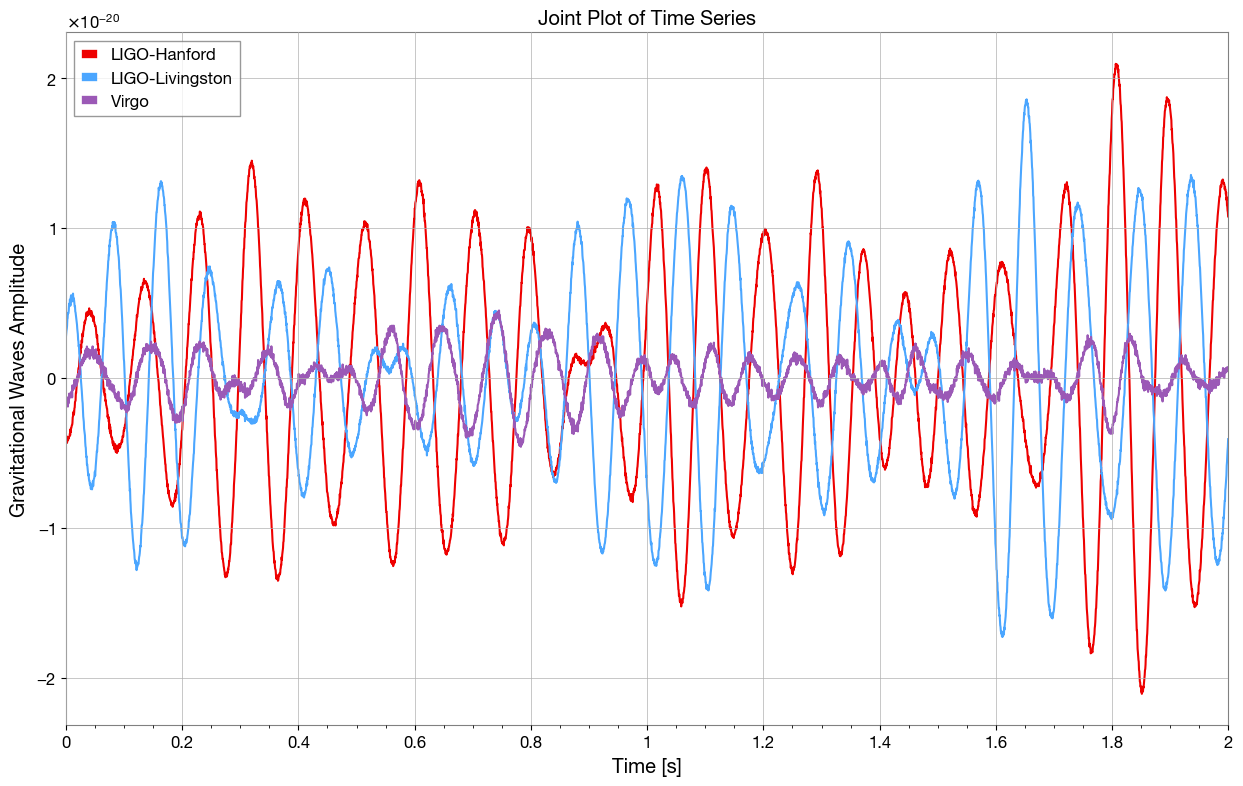

In [49]:
#Joint plot of time series with a signal
plot_data_jointly(ts_signal1,  ts_signal2,  ts_signal3)

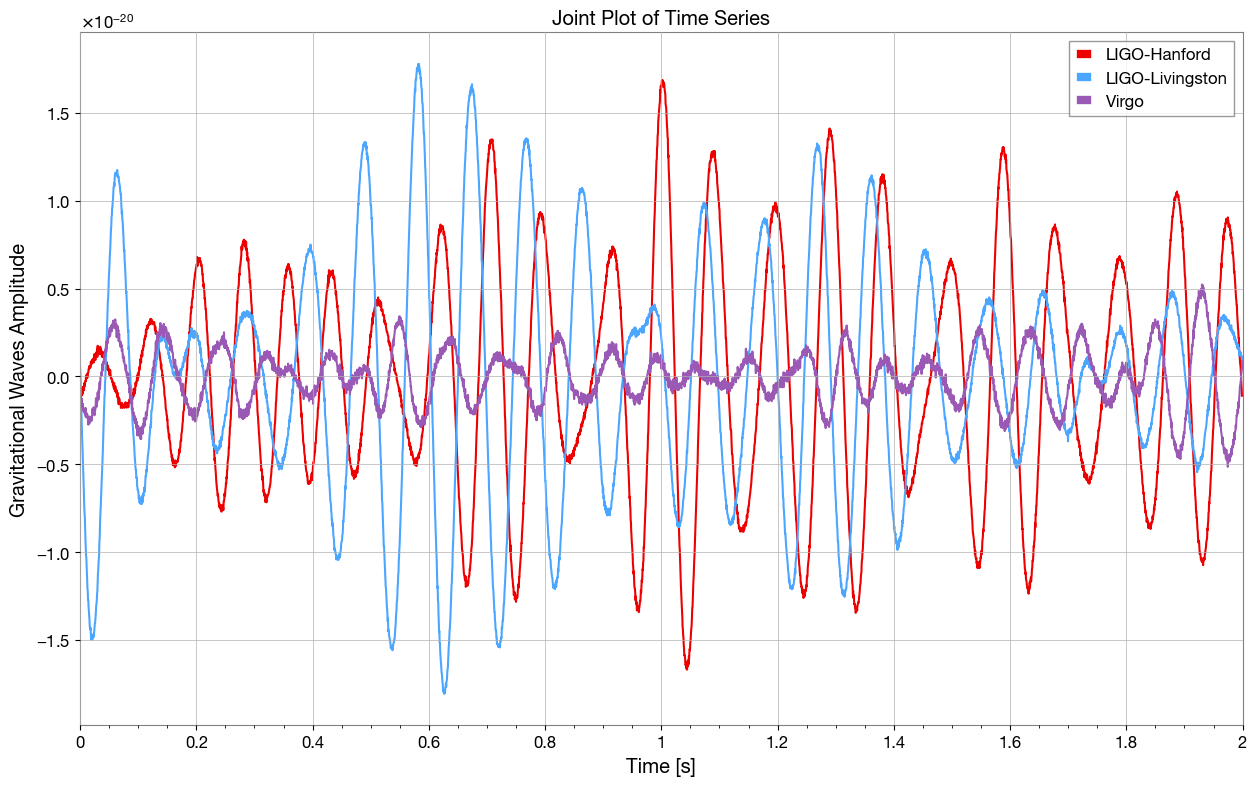

In [50]:
#Joint plot of time series without a signal
plot_data_jointly(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

- <font size = 4> We observe there is no visual diffrence, between a timeseris file with or withouth a signal.

- ## Generating a FrequencySeries

In [14]:
#Calculating the spectrum(Setting the Fourier Transformm Time domain to 2 seconds)
def calculateAsdSpectrum(ts1,ts2,ts3):
    spectrum1 = ts_signal1.asd(2)
    spectrum2 = ts_signal2.asd(2)
    spectrum3 = ts_signal3.asd(2)
    return spectrum1, spectrum2, spectrum3

In [15]:
#Storing calculated spectrum into variables for plotting
spectrum1, spectrum2, spectrum3 = calculateAsdSpectrum(ts_signal1,ts_signal1,ts_signal1)

In [16]:
#Function to plot the auto spectral density 
def asdSpctrumPlot(spectrum1,spctrum2, spectrum3): 
    plot1 = spectrum1.plot()
    plot2 = spectrum2.plot()
    plot3 = spectrum3.plot()
    ax = plot1.gca()
    plot1.axes[0].set_ylabel('GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
    plot2.axes[0].set_ylabel('GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
    plot3.axes[0].set_ylabel('GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
    plot1.show() 
    plot2.show()
    plot3.show()

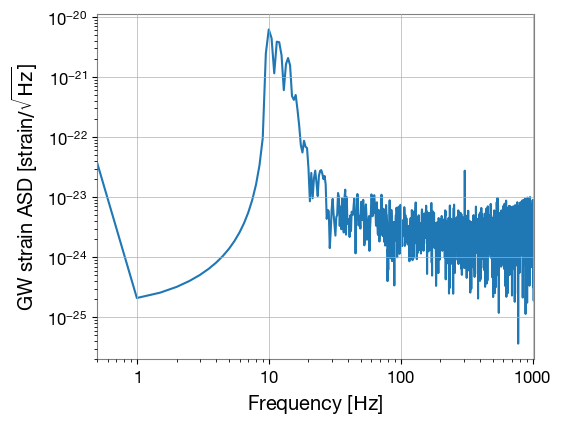

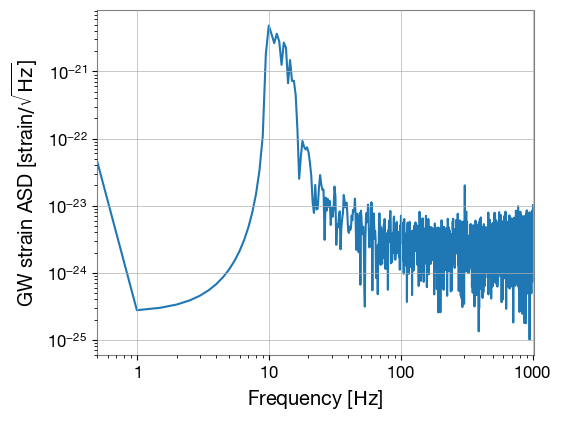

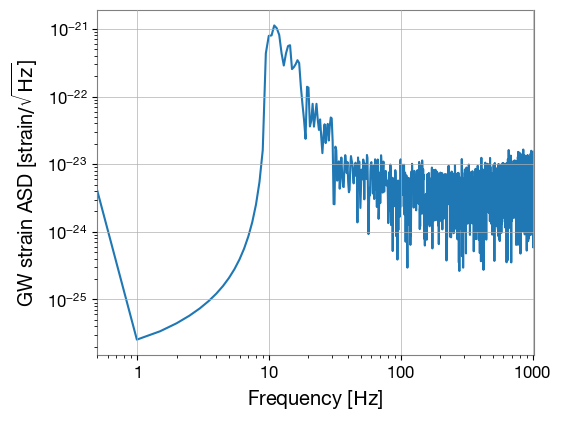

In [17]:
# Ploting Frequency Series
asdSpctrumPlot(spectrum1, spectrum2, spectrum3)

- ## Whitening

In [18]:
#Function to whiten the TimeSeries data
def whitenTimeSeries(ts1,ts2,ts3):
    ts1_whiten = ts1.whiten(2)
    ts2_whiten = ts2.whiten(2)
    ts3_whiten = ts3.whiten(2)
    return ts1_whiten, ts2_whiten, ts3_whiten

In [19]:
#Storing Whiten Time Series In Variables, and Ploting
ts1_whiten, ts2_whiten, ts3_whiten = whitenTimeSeries(ts_signal1,ts_signal2,ts_signal3)

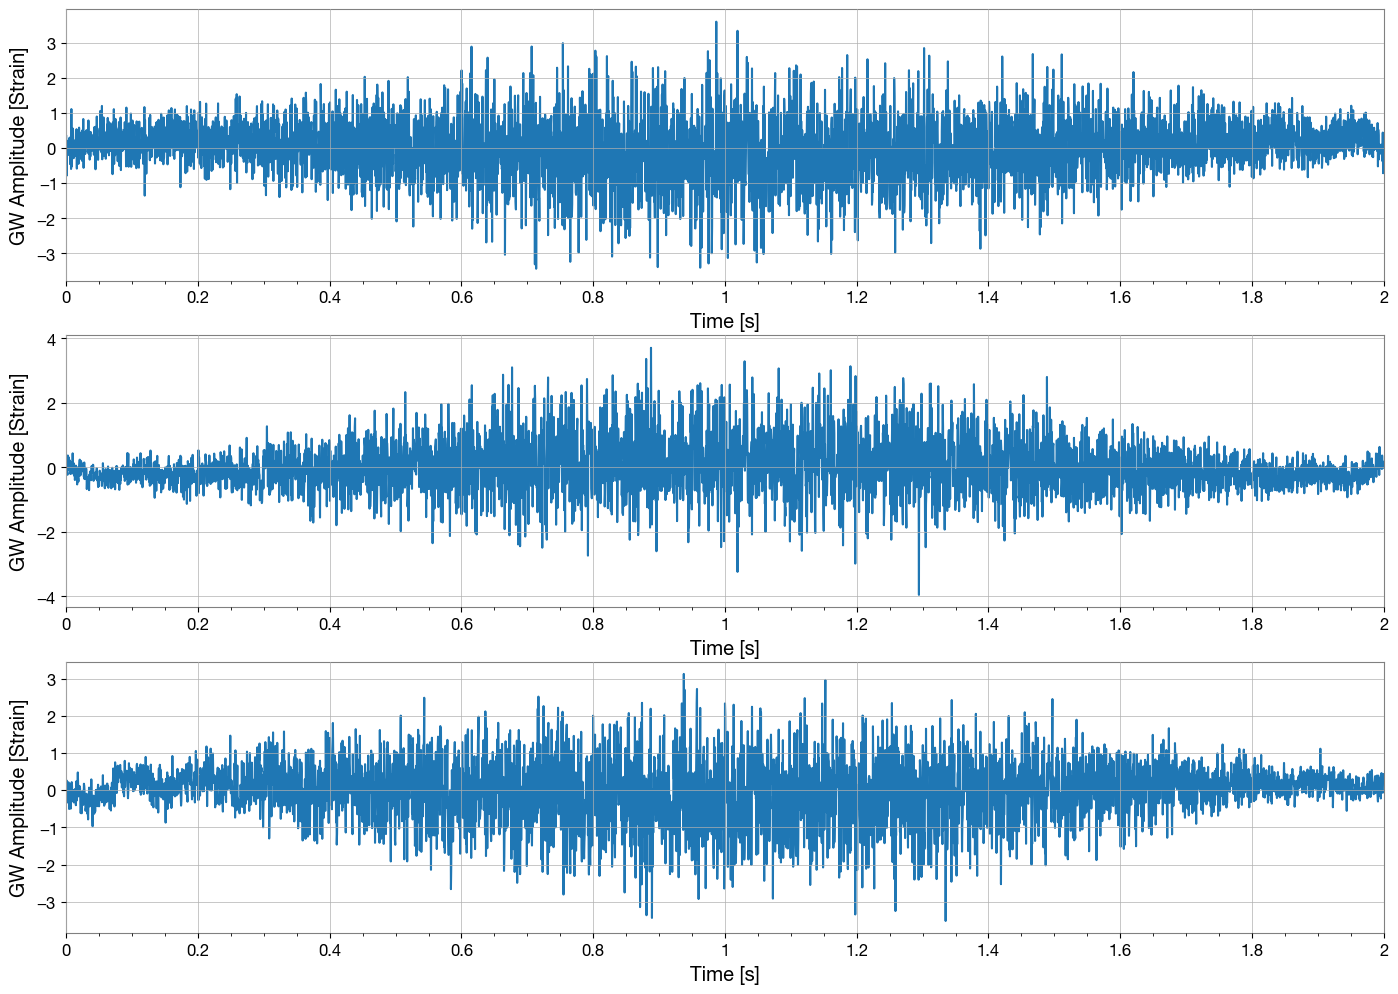

In [51]:
plot_data(ts1_whiten, ts2_whiten,ts3_whiten)

In [21]:
ts1_no_whiten, ts2_no_whiten, ts3_no_whiten = whitenTimeSeries(ts_no_signal1,ts_no_signal2,ts_no_signal3)

- ## Q transform, Not Complete

In [22]:
def qSpectrogramPlot(ts):
    qspecgram =ts.q_transform(outseg=(0.5, 1.5))
    plot = qspecgram.plot(figsize=[16, 8])
    ax = plot.gca()
    ax.set_xscale('seconds')
    ax.set_yscale('log')
    ax.set_ylim(0,650)
    ax.set_ylabel('Frequency [Hz]')
    ax.grid(True, axis='y', which='both')
    ax.colorbar(cmap='viridis', label='Normalized energy')
    plot.show()

/var/folders/yx/sqtjt7tj60zc4gdw10f4yq1c0000gp/T/ipykernel_27542/1111839587.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,650)
/Users/Robin1/opt/anaconda3/envs/COMP_542/lib/python3.9/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


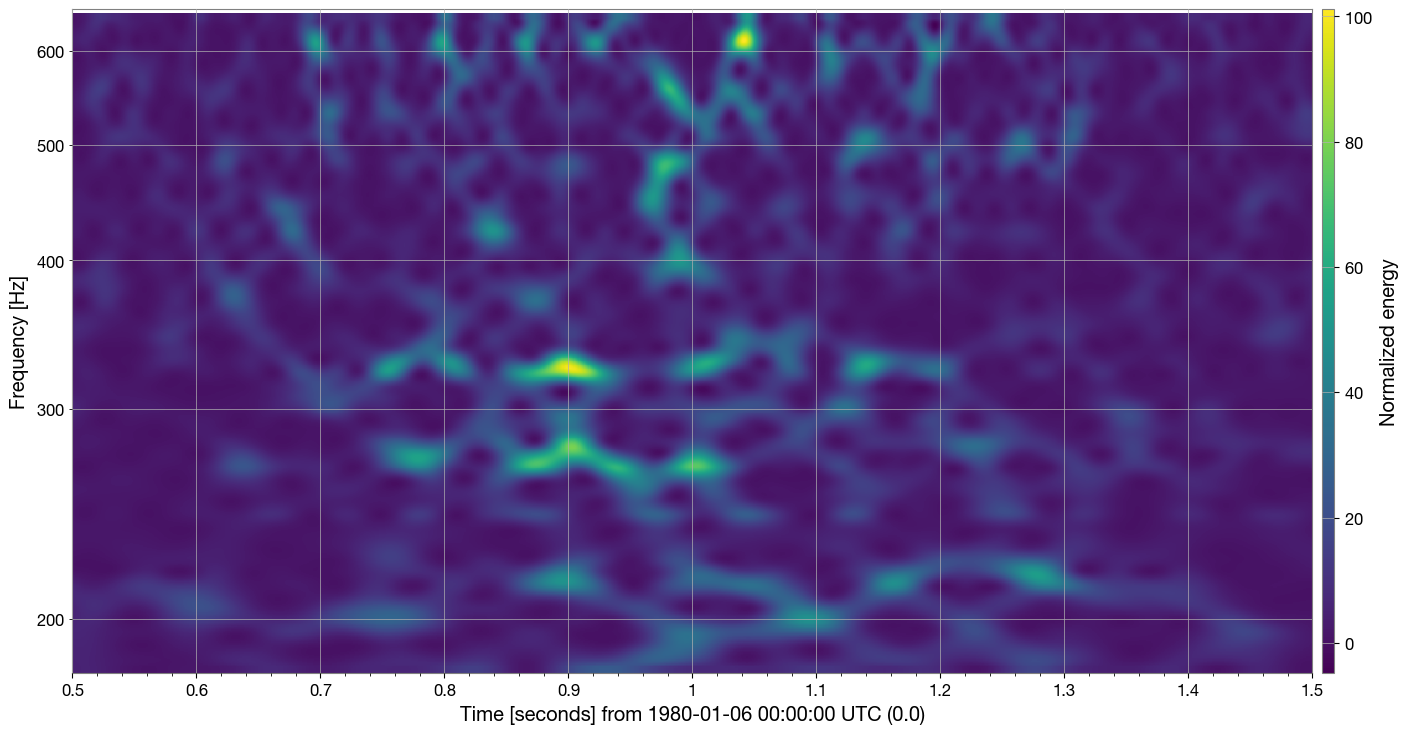

In [23]:
# Q transform Spectrogram Gravitatntional Wave time series without a signal
qSpectrogramPlot(ts1_whiten)

/var/folders/yx/sqtjt7tj60zc4gdw10f4yq1c0000gp/T/ipykernel_27542/1111839587.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,650)


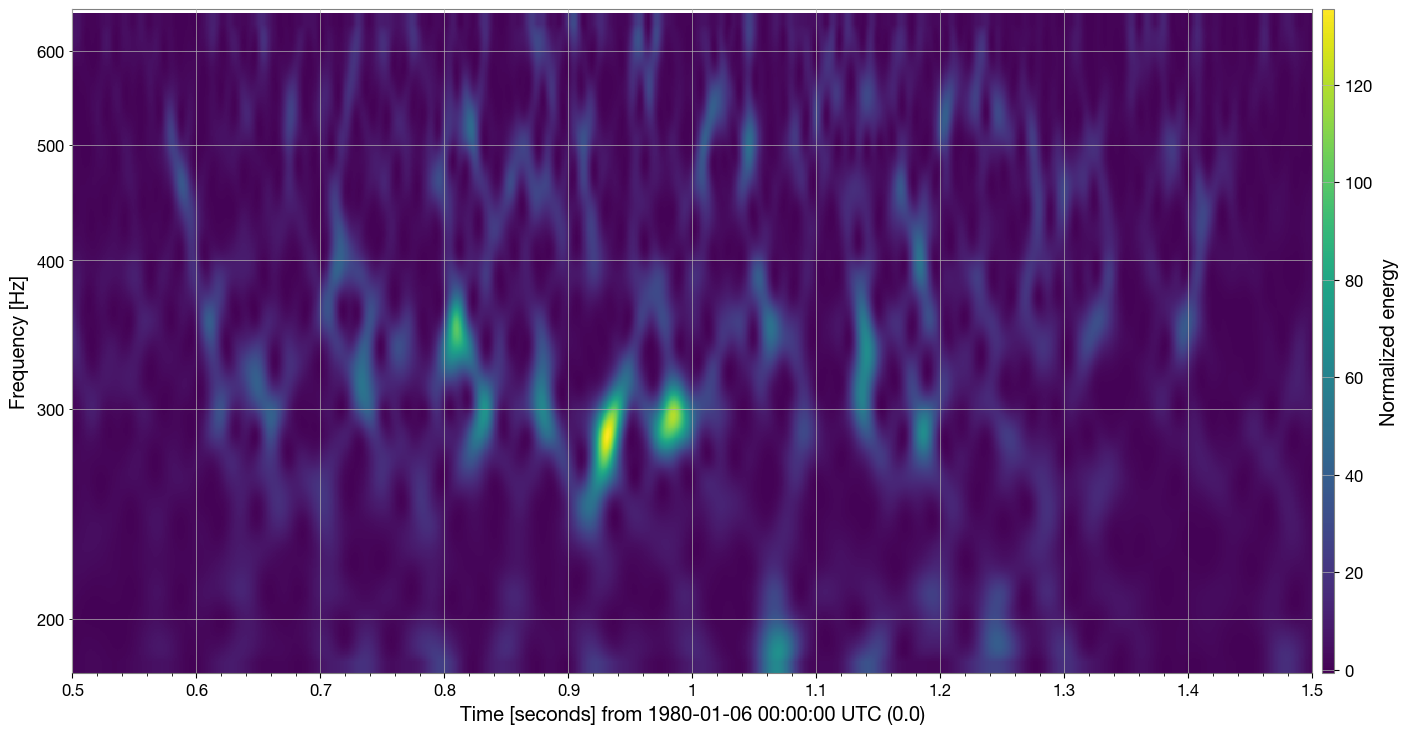

In [24]:
qSpectrogramPlot(ts2_no_whiten)

- ## Data Filtering

In [33]:
  qspecgram =ts2_no_whiten.q_transform(outseg=(0.5, 1.5))

In [35]:
 df= pd.DataFrame( qspecgram)

AttributeError: 'Spectrogram' object has no attribute 'summary'

- ## Data Normalization

- ## Training Label Data Analysis

In [25]:
#Loading training Labels File
training_path = "../../data/training_labels.csv"
training_labels = pd.read_csv(training_path)

In [26]:
#Calling Training Labels
training_labels

,id,target
0,00000e74ad,1
1,00001f4945,0
2,661522,0
3,00007a006a,0
4,0000a38978,1
...,...,...
559995,ffff9a5645,1
559996,ffffab0c27,0
559997,ffffcf161a,1
559998,ffffd2c403,0


<AxesSubplot: xlabel='target', ylabel='count'>

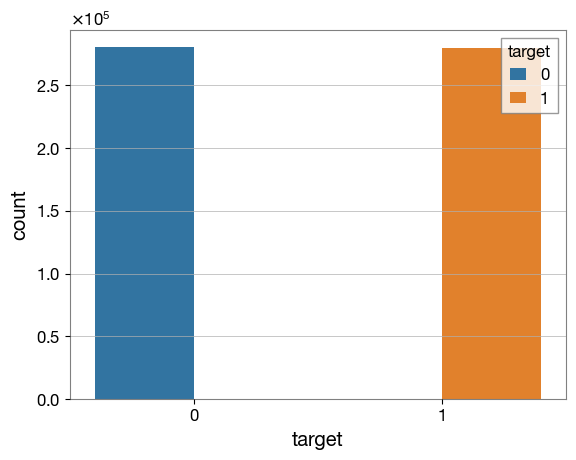

In [27]:
#Plotning a count plot to chck if training labels are balanced
sns.countplot(data = training_labels,x= "target", hue = "target")

- <font size = 4> We observe that the Training labels data set is balanced 

In [28]:
#Chacking Training Labels For Null Valulese
training_labels.isnull().sum()

id        0
target    0
dtype: int64

- <font size = 4> We observe that there are no null values in our data set

In [30]:
createTSDataFrame(sample_data_signal)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
LIGO Hanford,-3.987987e-21,-4.087335e-21,-3.885362e-21,-4.349054e-21,-4.332964e-21,-4.043617e-21,-4.111578e-21,-4.181146e-21,-4.121357e-21,-3.986568e-21,...,1.255108e-20,1.224923e-20,1.237885e-20,1.187777e-20,1.204895e-20,1.149246e-20,1.147108e-20,1.116085e-20,1.106867e-20,1.076994e-20
LIGO Livingston,2.715842e-21,2.971132e-21,3.152702e-21,3.263482e-21,3.454136e-21,3.903710e-21,3.981559e-21,4.331236e-21,4.309616e-21,4.311239e-21,...,-7.330637e-21,-7.013183e-21,-6.820173e-21,-6.498141e-21,-5.859472e-21,-5.616028e-21,-5.172692e-21,-4.834527e-21,-4.591164e-21,-4.090850e-21
Virgo,-1.607445e-21,-1.706287e-21,-1.665282e-21,-1.508614e-21,-1.779690e-21,-1.309486e-21,-1.660184e-21,-1.918871e-21,-1.420912e-21,-1.708509e-21,...,6.294173e-22,5.175884e-22,3.677564e-22,6.517513e-22,6.140908e-22,4.424185e-22,7.173844e-22,4.727638e-22,5.514401e-22,5.405978e-22
